# Simple Linear Regression

# Dataset

Population of U.S. Cities

# Description

The bigcity data frame has 49 rows and 2 columns.
The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken
from the 196 largest cities in 1920.

# Format

This data frame contains the following columns:

u The 1920 population.

x The 1930 population.

Source:

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References:

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press

# Exploring and Understanding Data (EDA)

# 1. Load required Libraries

In [1]:
# supress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# 'Os' module provides functions for interacting with the operating system 
import os

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
%matplotlib inline

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# 'Scikit-learn' (sklearn) emphasizes various regression, classification and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

# 'Statsmodels' is used to build and analyze various statistical models
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.tools.eval_measures import rmse
from statsmodels.compat import lzip
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.graphics.gofplots import qqplot


# 'SciPy' is used to perform scientific computations
from scipy.stats import f_oneway
from scipy.stats import jarque_bera
from scipy import stats

# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import SGDRegressor from sklearn to perform linear regression with stochastic gradient descent
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# import functions to perform feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

# import functions to perform cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# 2. Collect and load data

In [2]:
df = pd.read_csv('bigcity.csv')
df.head()

,Unnamed: 0,u,x
0,1,138,143
1,2,93,104
2,3,61,69
3,4,179,260
4,5,48,75


In [3]:
df.rename(columns = {'Unnamed: 0':'U.S. Cities', 
                     'u': 'Pop in 1920', 
                     'x': 'Pop in 1930'}, inplace = True)

In [4]:
df.head()

,U.S. Cities,Pop in 1920,Pop in 1930
0,1,138,143
1,2,93,104
2,3,61,69
3,4,179,260
4,5,48,75


In [7]:
df.dtypes

U.S. Cities    int64
Pop in 1920    int64
Pop in 1930    int64
dtype: object

In [9]:
df['U.S. Cities'] = df['U.S. Cities'].astype('object')
df.dtypes

U.S. Cities    object
Pop in 1920     int64
Pop in 1930     int64
dtype: object

# 3. Explore numeric variables - five number summary

In [10]:
df_num = df.select_dtypes(include= np.number)
df_num.head()

,Pop in 1920,Pop in 1930
0,138,143
1,93,104
2,61,69
3,179,260
4,48,75


In [12]:
df_num.describe()

,Pop in 1920,Pop in 1930
count,49.000000,49.000000
mean,103.142857,127.795918
std,104.405061,123.121211
min,2.000000,46.000000
25%,43.000000,58.000000
50%,64.000000,79.000000
75%,120.000000,130.000000
max,507.000000,634.000000


# 3a. Visualize numeric variables in boxplot and histograms

Text(0.5, 1.0, 'Histogram - Population in 1930')

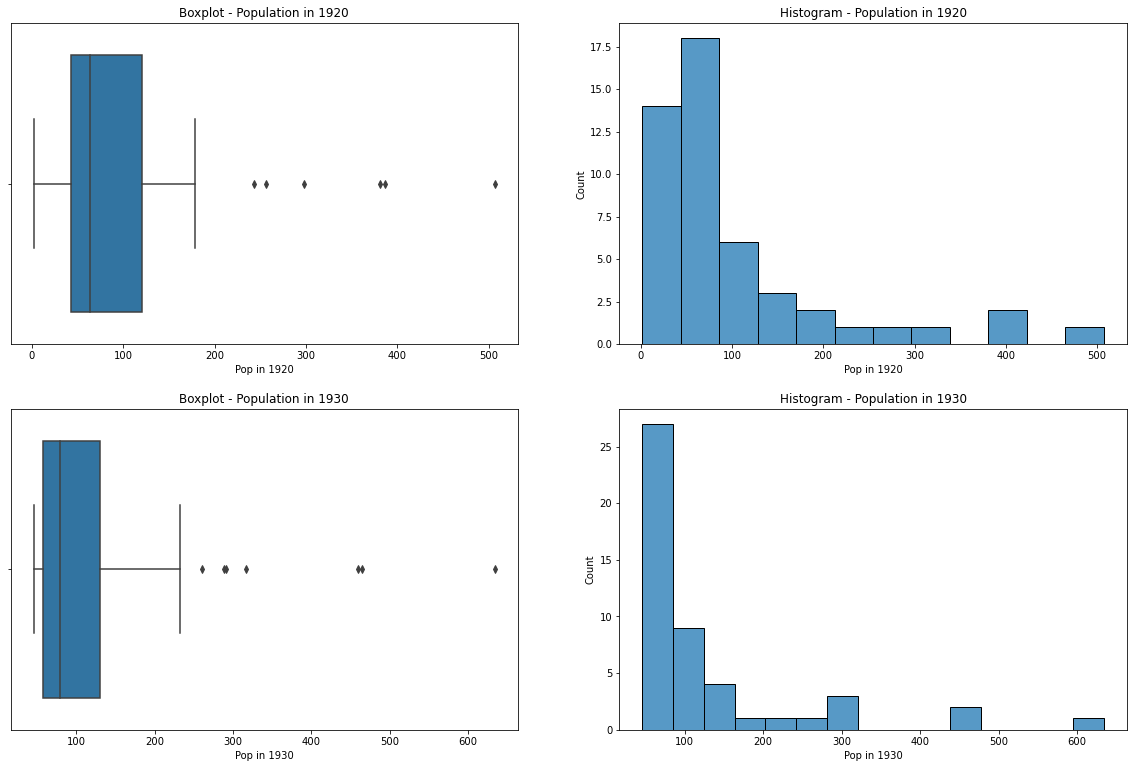

In [26]:
plt.figure(figsize=(20,13))

plt.subplot(2,2,1)
sns.boxplot(df_num['Pop in 1920']) 
plt.title('Boxplot - Population in 1920')

plt.subplot(2,2,2)
sns.histplot(df_num['Pop in 1920']) 
plt.title('Histogram - Population in 1920')

plt.subplot(2,2,3)
sns.boxplot(df_num['Pop in 1930'])
plt.title('Boxplot - Population in 1930')

plt.subplot(2,2,4)
sns.histplot(df_num['Pop in 1930']) 
plt.title('Histogram - Population in 1930')

# 3b. Measure spread – variance and standard deviation

In [50]:
# Variance: 

df_num.var()

Pop in 1920    10900.416667
Pop in 1930    15158.832483
dtype: float64

In [51]:
# Standard Deviation

df_num.std()

Pop in 1920    104.405061
Pop in 1930    123.121211
dtype: float64

# 4. Explore relationships between variables using scatterplots and two-way cross tabulations

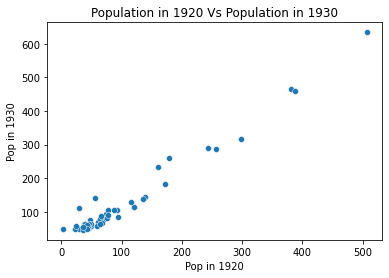

In [55]:
sns.scatterplot(df['Pop in 1920'], df['Pop in 1930']) 

plt.title('Population in 1920 Vs Population in 1930')
plt.show()

# 5. Transform the dataset
Find the number of rows in given dataset and separate the input and target variables into X and Y. Hint: You can shape function 
to get the size of the dataframe

In [41]:
df.shape

(49, 3)

In [49]:
X = df[['U.S. Cities', 'Pop in 1920']] 
Y = df[['Pop in 1930']] 

X.shape, Y.shape

((49, 2), (49, 1))

# 6. Check the dataset for any missing values and also print out the correlation matrix
You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

The high correlation betwwen u and x indicates that the variable u is a good predictor of variable x

In [60]:
# Missing Values: 

No_of_missing_values = df.isnull().sum().sort_values(ascending=False)          
Percentage_of_missing_values = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)   

missing_data = pd.concat([Total, Percent], axis=1, keys=['No_of_missing_values', 'Percentage_of_missing_values'])    
missing_data

,No_of_missing_values,Percentage_of_missing_values
U.S. Cities,0,0.0
Pop in 1920,0,0.0
Pop in 1930,0,0.0


In [63]:
# Correlation matrix: 

df.corr()

,Pop in 1920,Pop in 1930
Pop in 1920,1.000000,0.981742
Pop in 1930,0.981742,1.000000


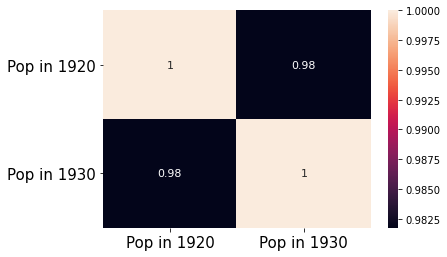

In [62]:
sns.heatmap(df.corr(), annot = True, annot_kws = {"size": 11})
plt.yticks(rotation = 'horizontal', fontsize = 15)
plt.xticks(fontsize = 15)
plt.show()

# 7. Split data into train, test sets
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature 
sets.*
Check: train_test_split function

In [67]:
X = X[['Pop in 1920']]   # Selecting only the variable - 'Pop in 1920' from X to use as train data and build the model

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state= 1, test_size = 0.2)

# checking the dimensions of the train & test subset
# print dimension of train set
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)

# print dimension of test set
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (39, 1)
y_train: (39, 1)
X_test: (10, 1)
y_test: (10, 1)


# 8. Find coefficients & intercept
Estimate the coefficients b0 and b1 using scikit-learn.
Check: coef_ and intercept_ functions can help you get coefficients & intercept

In [79]:
linreg = LinearRegression() 

linreg_model = linreg.fit(X_train, y_train)

In [108]:
# Estimating b0: 

b0 = linreg_model.intercept_
b0

array([9.71845532])

In [109]:
# Estimating b1: 

b1 = linreg_model.coef_
b1

array([[1.15945123]])

# 9.  Linear Relationship between feature and target
Plot the line with b1 and b0 as slope and y-intercept.

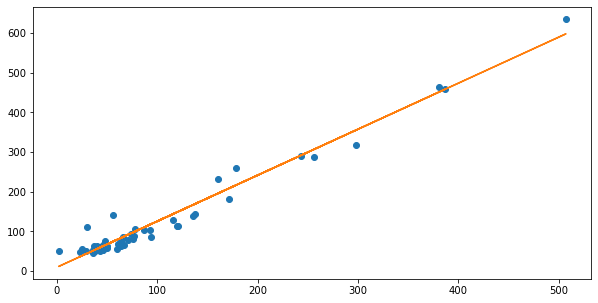

In [116]:
x = X[['Pop in 1920']] 
y = Y[['Pop in 1930']]

plt.figure(figsize=(10,5))
plt.plot(x, y, 'o')

plt.plot(x, (b1*x)+b0)
plt.show()

# 10. Evaluation of model with scikit-learn
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean 
square error over mean square error gives you root mean square error

In [126]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test) 

model_ols = sm.OLS(y_train, X_train).fit() 
model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Pop in 1930   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1127.
Date:                Wed, 03 Nov 2021   Prob (F-statistic):           2.58e-29
Time:                        20:38:58   Log-Likelihood:                -177.94
No. Observations:                  39   AIC:                             359.9
Df Residuals:                      37   BIC:                             363.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           9.7185      5.231      1.858      0.071      -0.881      20.318
Pop in 1920     1.1595      0.035     33.573      0.000       1.089       1.229
==============================================================================
Omnibus:                       12.712   Durbin-Watson:                   1.642
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.946
Skew:                           1.171   Prob(JB):                      0.00154
Kurtosis:                       4.577   Cond. No.                         208.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [127]:
# RMSE of training data: 
y_train_pred = model_ols.predict(X_train) 
y_test_pred = model_ols.predict(X_test) 

rmse_train = mean_squared_error(y_train, y_train_pred, squared= False) 
print("Root Mean Squared Error of Train data:",rmse_train)

rmse_test = mean_squared_error(y_test, y_test_pred, squared= False) 
print("Root Mean Squared Error of Test data:",rmse_test)

Root Mean Squared Error of Train data: 23.18943724391406
Root Mean Squared Error of Test data: 23.38523519024913


In [129]:
from sklearn.metrics import r2_score

print("R^2 score of Train data:",r2_score(y_train, y_train_pred)) 
print("R^2 score of Test data:",r2_score(y_test, y_test_pred))

R^2 score of Train data: 0.9682175540860046
R^2 score of Test data: 0.918192256039698


# 11. Calculate the accuracy of the model for both training and test data set

Hint: .score() function

In [94]:
print("R^2 score of Train data:",linreg_model.score(X_train, y_train)) 
print("R^2 score of Test data:",linreg_model.score(X_test, y_test))

R^2 score of Train data: 0.9682175540860046
R^2 score of Test data: 0.9181922560396981
